# Lecture 1. Review: Simple Linear Regression

## 1.1 Review: 통계적 추론방법 
### 평균에 대한 추정과 검정


#### Example: Web Stickiness 

- 고가의 상품을 판매하는 온라인 쇼핑몰
- 방문자가 웹페이지에 머무르는 시간이 길수록 구매로 이어짐
- 한 웹관리자는 평균 session time이 길어야 160초이고 이를 늘리기 위해 새로운 웹 프레젠테이션이 필요하다고 주장함. 이 주장이 얼마나 믿을만 한가? 


In [1]:
from pathlib import Path
import random

import pandas as pd
import numpy as np
import pylab 
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import weightstats
from statsmodels.stats import proportion
from scipy.stats import t

import matplotlib.pylab as plt
%matplotlib inline

data_path = "../data/"

session_times = pd.read_csv(data_path + 'web_page_data.csv')
session_times.Time = 100 * session_times.Time # 초 단위로 변환

ad = pd.read_csv(data_path + "Advertising.csv")

In [2]:
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [3]:
session_times.Time.mean(), session_times.Time.std()

(141.19444444444446, 94.24067045736659)

In [4]:
session_times.shape

(36, 2)

### 신뢰구간

In [5]:
# 95% 신뢰구간
stat = weightstats.DescrStatsW(session_times.Time)
stat.tconfint_mean(alpha=0.05)

(109.30798906792316, 173.08089982096575)

In [6]:
# 99% 신뢰구간 -> 95% 신뢰구간보다 넓어진다. -> 신뢰구간이 넓으면 추정으로의 의미가 없다.
stat = weightstats.DescrStatsW(session_times.Time)
stat.tconfint_mean(alpha=0.01)

(98.41223362402965, 183.97665526485926)

### 가설검정
1. 가설설정

    - 귀무가설    
      $$H_0: \mu=160 \mbox{ (or } \mu \geq 160)$$
      (-> 귀무가설에 반드시 등호가 포함되어야한다.)
      

    - 대립가설    
      $$H_1: \mu < 160$$

2. 유의수준 설정
    - 귀무가설이 참인데 귀무가설을 기각할 확률
    - 귀무가설이 사실이라고 가정할 때 표본 통계량이 얼마나 극단적인 값(일어날 확률이 낮은 값)이어야 귀무가설이 사실이 아니라고 판단할 지에 대한 임계값
    - 얼마만큼의 제 1종 오류를 가설검정 과정에서 감당할 것인가?
    - 일반적으로 $\alpha=0.01, 0.05, 0.1$으로 설정 


$$\alpha=0.05$$


3. 가정 체크 
    - One sample t-test의 가정 
        - 자료가 정규분포를 따른다 (분포가 종모양) **또는**
        - 심하게 편중되거나 극단치를 포함한 경우 표본수가 50개 (혹은 30개) 이상이다.


<AxesSubplot:>

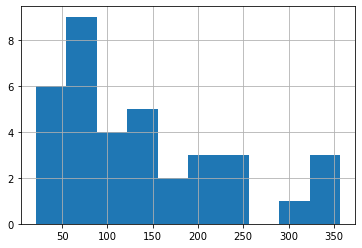

In [7]:
session_times.Time.hist()

4. 검정통계량과 P-value의 계산
    - 귀무가설이 참이라고 가정할 때 아래의 T-통계량은 자유도 n-1을 가지는 t분포를 따름  
        $$ \mbox{T-statistics} =\frac{\bar x - \mu_0 }{s/\sqrt n } \sim t_{n-1}$$  

In [8]:
t_result = stat.ttest_mean(value = 160, alternative='smaller')
print('T_statistics: %.3f, p-value: %.3f, degrees of freedom: %i' %(t_result))

T_statistics: -1.197, p-value: 0.120, degrees of freedom: 35


In [9]:
t_result = stat.ttest_mean(value = 160, alternative='smaller');t_result

(-1.1972891617359385, 0.11962012721253615, 35.0)

In [10]:
# 엑스바가 뮤보다는 작으나 충분이 작지 않기 때문에 귀무가설로 결론을 내림.

### 수치형 변수(평균)에 대한 추론 
- y = 수치형 변수 

`` import statsmodels.stats.weightstats as stat``

`` import statsmodels.stats as stats``

|     문제                          |      &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 관심모수    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;    |     &nbsp;&nbsp;&nbsp;&nbsp;  점추정량   &nbsp;&nbsp;&nbsp;&nbsp;     |                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   가정체크  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                    | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      검정가설  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        |                                         검정방법/Python 명령어                                         |
|:-------------------------------:|:------------------------------:|:---------------------------:|:--------------------------------------------------:|:-----------------------:|:----------------------------------------------------------------------------------------:|
| 한 그룹 평균                   | $\mu$                  | $\bar x$              | $n>30 (>50)$ <br> or 정규분포                     | $H_0: \mu=\mu_0$        |One-sample T-test <br>  ``stat.ttest_mean``         |
| 두 그룹 평균 비교(독립표본)   | $\mu_1-\mu_2$          | $\bar x_1 - \bar x_2$ | $n_1 + n_2>30(>50)$ <br> 두 집단 모두 정규분포  | $H_0: \mu_1 - \mu_2 = 0$| Two-sample t-test <br> ``stat.ttest_ind`` |
| 두 그룹 평균 비교 (쌍체표본)  | $\mu_d$                | $\bar x_d$            | $n>30 (>50)$ </br> or 정규분포                     | $H_0: \mu_d=0$          | Paired t-test <br>``stat.ttest_mean`` |
| 셋 이상 그룹 평균 비교        | $\mu_1, \ldots, \mu_m$ |  $\hat\mu_1, \ldots, \hat\mu_m$                      |  $n_i>30 (>50)$  or 정규분포 <br> 등분산| $H_0: \mu_1 = \cdots = \mu_m$ |ANOVA <br> ``statsmodels.stats.anova.AnovaRM``
| 양적변수 간의 상관관계               | $y=\beta_0+\beta_1 x+\epsilon$ <br>$\beta_0, \beta_1$     |   $\hat \beta_0, \hat \beta_1$                    |                                                                                                                                                      선형성, 독립성, 등분산성, 정규성                    | $H_0: \beta_i=0$                       | Regression <br>`statsmodels.api.OLS`                                                  |

### 범주형변수(비율)에 대한 추론 
- y = 범주형 변수  

|         &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 문제    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp; |     &nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; 모수  &nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;|   &nbsp;&nbsp;&nbsp;&nbsp;점추정량  &nbsp;&nbsp;&nbsp;&nbsp;|가정체크 |   &nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  검정가설&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;&nbsp;  | 검정방법                                                      |
|:-------------------:|:--------------------:|:-------------------------------:|:------------------------------------------------------------:|:------------------------------------------------------------------------------------:|:---------------------------------------------------------------:|
| 한 그룹 비율      | $p$                | $\hat p$                      | $np>5$<br> $n(1-p)>5$                                          | $H_0: p=p_0$                                                                       | Z-test  <br> ``stats.proportion.proportions_ztest``                |
| 두 그룹 비율 비교     | $p_1 - p_2$        | $\hat p_1 - \hat p_2$         | $n_i p_i >5$<br>$ n_i (1-p_i)>5$  | $H_0: p_1-p_2=0$                                                                   | Z-test <br> ``stats.proportion.proportions_ztest``  |
| 적합성 검정       | $p_1, \ldots, p_m$ | $\hat p_1, \ldots, \hat p_m$  | 모든 기대빈도>5                                            | $H_0: p_1=p_{01},\ldots,p_m=p_{0m}$        | Chi-square test<br>``scipy.stats.chisquare``|
| 독립성 검정       |                    |                               | 모든 기대빈도>5                                            | $H_0:$ 두 범주형 변수가 독립이다.  | Chi-square test <br>``scipy.stats.chi2_contingency``         |
| 양적변수와의 관계 |$logit(p)=\beta_0+\beta_1 x$ <br> $\beta_0, \beta_1$ |   $\hat \beta_0, \hat \beta_1$                            |                                                   종속변수가 이항분포         |                                                                         $H_0: \beta_i=0$           | Logistic regression <br>``sklearn.linear_models.LogisticRegression ``| 

## 1.2 Review: Simple Linear Regression

### 예: Advertising 
- Advertising data는 200개의 다른 시장에서 제품의 sales(단위: 1천 유닛)와 각 시장별로 그 제품에 대한 광고예산(단위: 1천 달러)으로 구성된다. 광고 예산은 세가지 매체(TV, radio, newspaper)에 대한 것이다. 세 매체에 대한 광고 지출을 제어함으로써 간접적으로 판매를 증진시키려고 한다. 

    - 광고 예산과 판매 사이에 상관관계가 있는가?
    - 광고 예산과 판매 사이에 얼마나 강한 상관관계가 있는가? 


### 단순회귀분석 
- 하나의 종속변수와 하나의 설명변수 간의 관계를 직선으로 표현하는 방법
- 종속변수: 예측될 변수
- 설명변수 (독립변수): 종속변수를 예측하는데 활용될 변수 

In [11]:
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


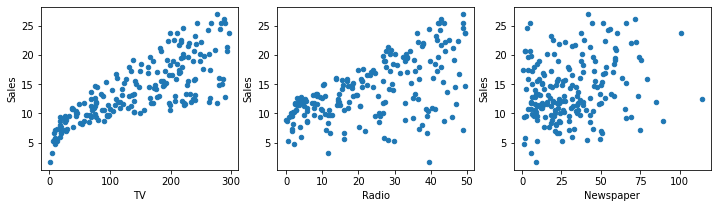

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
ad.plot.scatter('TV', 'Sales', ax = axes[0])
ad.plot.scatter('Radio', 'Sales', ax = axes[1] )
ad.plot.scatter('Newspaper', 'Sales', ax = axes[2] )
plt.show()

### 상관분석 vs 회귀분석
- 상관분석
    - 두 변수 간의 선형관계의 강도 측정
    - 인과관계 없음
    - False 상관관계 유의
    
- 회귀분석
    - 원인이 되는 변수 (설명변수)에 따른 종속변수의 결과 예측 (의존적 관계) 
    - 둘 이상의 변수들 간의 관계 
    - 상관관계 포함
    - 인과관계는 통계학의 범주를 넘어서서 이론적인 선험적인 고려가 선행되어야 한다. 

<img src="figures/regcor.jpg" width=50%>

### 1.2.1 단순 선형회귀 모형 
#### Example: Advertisement 
- TV 광고예산과 판매량의 관계를 선형식으로 표현
$$ Sales \approx \beta_0 + \beta_1 \times TV $$

#### 단순 선형회귀 모형
$$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i,~~~ i=1,2,\ldots,n $$

- $\beta_0$: 절편 (모수)
- $\beta_1$: 기울기 (모수)
- $\epsilon_i$: 오차항 (확률변수: 평균 0, 분산 $\sigma^2$)

#### 추정된 회귀식 
$$ \hat y_i = \hat \beta_0 + \hat \beta_1 x_i $$

- $\hat y_i$: $x_i$ 값에 대한  $y_i$의 예측값 

- $\hat \beta_0, \hat \beta_1$: 계수추정치 

      
#### 선형회귀모형의 가정 

- $y$와 $x$는 선형관계이다.
- 오차항은 서로 독립이다. 
- 오차항 분산은 동일하다
- 오차항은  정규분포를 따른다. 

      
### 1.2.2 회귀계수의 추정

- n개의 관측치 쌍이 주어진 상황
$$(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n) $$

- 어떤 $\hat y_i = \hat \beta_0 + \hat \beta_1 x$가 좋은 추정치인가?

<img src='http://drive.google.com/uc?export=view&id=1djl6jmwfZM5OHn6MrH3jv_Erz5YYdXhR' width=500 /><br>

#### 최소제곱법(Least Square Estimation; LSE) 
- 잔차(residual)
$$e_i=y_i -\hat y_i$$
    - 잔차를 줄이는 회귀선이 좋음.
- 잔차제곱합(Residual Sum of Square; RSS)
$$RSS=e_1^2 +e_2^2 + \cdots + e_n^2 $$

- 최소제곱법
    - RSS를 최소화 하는 $\hat \beta_0,\hat \beta_1$을 선택 
    
    $$ \hat \beta_1= \frac{\sum_{i=1}^n (x_i-\bar x)(y_i -\bar y)}{\sum_{i=1}^n (x_i -\bar x)^2 }$$
    $$\hat \beta_0=\bar y - \hat \beta_1 \bar x $$

    

In [13]:
model = smf.ols('Sales ~ TV', data = ad).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        17:12:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

     
#### 회귀계수의 해석
- 추정된 회귀식
$$ \hat y = 7.033 + 0.0475 x$$
- $\hat \beta_1$: TV광고 투자가 매 1천달러 증가할 경우 판매량은 47.5 유닛만큼 증가한다.
    
- $\hat \beta_0$: TV광고 투자가 0달러 일때 판매량은  7033 유닛이다(?!)  
    - $\beta_0$의 해석은 주의해야 함. 0이 데이터의 범위 안에 포함되는지 확인. 
     


### 1.2.3 계수 추정값의 정확도 평가
- $\hat \beta_1$의 해석 중 "47.5 유닛"이 얼마나 정확할까? 
    - 다른 표본을 사용한다면? 
    - 1000개의 서로 다른 표본을 사용하여 회귀계수를 계산하였을 때 그 값의 평균과 표준편차는? 
      
- 모회귀선과 최소제곱선 
<img src='http://drive.google.com/uc?export=view&id=1imTLmKdnTwMUFfO_TPZDK9oXgmn1kAox' width=500/><br>

- 최소제곱선의 평균 
 $$E(\hat \beta_0)=\beta_0,~~E(\hat \beta_1)=\beta_1 $$

  - 특정 데이터셋에 대해 계산한 $\hat \beta_0, \hat \beta_1$은  $\beta_0, \beta_1$과 정확히 일치하지 않음 
  - 많은 수의 데이터 셋에 대해 얻은 여러 $\hat \beta_0, \hat \beta_1$을 평균하면 $\beta_0, \beta_1$와 일치 &rarr; **비편향 추정량(Unbiased estimator)**

- 최소제곱선의 표준오차 (standard error)
    - 하나의 추정값 $\hat \beta_0, \hat \beta_1$은 $\beta_0, \beta_1$과 얼마나 다를 것인가? 
    $$SE(\hat \beta_0)^2 = \sigma^2 \left[ \frac 1 n + \frac{\bar x^2 }{ \sum_{i=1}^n (x_i - \bar x)^2 }\right],~~SE(\hat \beta_1)^2 = \frac {\sigma^2 }{\sum_{i=1}^n (x_i - \bar x)^2}  $$
    - $\hat \sigma^2 = RSS/(n-2)$ 사용하여 SE를 추정 

      
      

#### 회귀계수에 대한 95% 신뢰구간
$$\hat \beta_1 \pm 2\cdot SE(\hat \beta_1),~~  \hat \beta_0 \pm 2\cdot SE(\hat \beta_0)$$
     

In [14]:
model.conf_int(alpha=0.05)

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [15]:
# beta_hat 에 대한 추정 -> y_hat에 대한 추정과는 상이

-  광고를 전혀 하지 않으면 평균 판매량은 [6130, 7940] 사이의 값으로 떨어진다 
- TV광고 투자가 매 1천달러 증가할 경우 판매량은 평균 [42, 53] 사이의 값만큼 증가한다.

&nbsp;

#### 회귀계수에 대한 가설검정
- 귀무가설, 대립가설
 $$H_0: \beta_1=0$$
 $$H_1: \beta_1\neq0$$
 
- 검정통계량
$$t=\frac{\hat \beta_1}{ SE(\hat \beta_1)}$$

    - $H_0$가 사실일 때  $t \sim t_{n-2}$ 분포를 따른다.

  
- p-value
    - $H_0$가 사실일 때 어떤 값이 $|t|$와 같거나 큰 경우를 관측할 확률 
    - 실질적인 상관성이 없는데도 우연히 의미있는 상관성이 예측될 확률 
    - p-value가 충분히 작으면 상관성이 있다고 결론 ($H_0$  기각)

- 회귀계수 해석의 주의점
    - 귀무가설 $H_0: \beta_1=0$  기각하여 x와 y의 관계가   유의하다고 하더라도 x와 y 간에 원인-결과 관계가 존재한다고 결론 내릴 수는 없다.
    
    - $H0: \beta_1=0$을 기각하고 통계적 유의성만 검정할 수 있기 때문에 x와 y의 관계가 선형이라고 결론내릴 수 없다. 
    
    - $\hat \beta_0$에 대한 해석은 설명변수 자료의 범위가 0을 포함할 때만 의미가 있다. 
    

### 1.2.4 모델의 정확도 평가
- 모델이 데이터에 얼마나 적합한가? 

#### 결정계수 $R^2$
- 비율로 표현되는 적합도 측도
$$R^2 = \frac{TSS-RSS}{TSS} = 1-\frac{RSS}{TSS} $$
    - $TSS=\sum(y_i-\bar y)^2$: 총 제곱합 (회귀분석 수행 전 $Y$안에 내재된 변동량)
    - $TSS-RSS=\sum(\hat y_i-\bar y)^2$: 회귀를 수행함으로써 설명된 Y의 변동량 
    - $RSS=\sum(y_i-\hat y)^2$: 회귀식에 의해 설명되지 않는 Y의 변동량 

- $0\leq R^2 \leq 1$
- X를 사용하여 설명될 수 있는 Y의 변동 비율(proportion of variability)
    - $R^2 \approx 1$: $Y$의 변동 중 많은 부분이 회귀식에 의해 설명
    - $R^2 \approx 0$: $Y$의 변동 중 대부분이 회귀식에 의해 설명되지 않음 

In [16]:
model.rsquared

0.611875050850071

- sales의 변동 중 61%가 TV에 대한 선형회귀에 의해 설명된다. 
- 단순선형회귀에서는 $R^2$는 피어슨 상관계수의 제곱과 같다.


In [17]:
stats.pearsonr(ad.Sales,ad.TV)[0]**2

0.6118750508500714



### 1.2.5 예측
- 주어진 독립변수에 대한 종속변수의 값을 추정된 회귀식에 의해 예측한다.

$$\hat y= \hat \beta_0 + \hat \beta_1 x^*  $$

In [18]:
pred = model.get_prediction(exog = dict(TV=100))
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.786258,0.262897,11.26782,12.304695,5.339251,18.233264


#### 신뢰구간 
- 수많은 도시에 대한 **평균** 판매량을 둘러싼 불확실성을 수량화
- TV광고에 10만달러를 지출한다면 판매량의 평균은 11268개와 12305개 사이일 것으로 95% 확신함


#### 예측구간
- **특정** 도시의 판매량에 대한 불확실성을 수량화
- TV광고에 10만달러를 지출한 도시에서 판매량은 5339개와 18233개 사이일 것으로 95% 확신함  

- 회귀식은 가지고 있는 data 범위 밖에서 예측은 주의!! (Extrapolation 문제)